# Regression
### To predict the car prices considering various features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amesh\Praju\Prajkta Data Science\Machine learning\extended_data.csv")

In [3]:
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [4]:
df.shape

(28143, 8)

In [5]:
df.columns

Index(['model_year', 'brand', 'model', 'type', 'miles_per_gallon',
       'premium_version', 'msrp', 'collection_car'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [7]:
df[df.duplicated()]  

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [8]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [9]:
for i in df.columns:
    print(i,df[i].nunique())

model_year 36
brand 57
model 1898
type 9
miles_per_gallon 121
premium_version 2
msrp 2950
collection_car 2


In [10]:
df['miles_per_gallon'].mean()

21.769241982507285

In [11]:
df['miles_per_gallon']=df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean())
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [12]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon     0
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [13]:
df['msrp']=df['msrp'].fillna(df['msrp'].mean())

In [14]:
df.isnull().sum()

model_year          0
brand               0
model               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
collection_car      0
dtype: int64

In [15]:
cat=[]
num=[]         # if unique values are less 10 then consider it as categorical data
for i in df.columns:
    if df[i].nunique()<100:
        print(i,df[i].nunique(), df[i].unique())
        cat.append(i)
    else:
        num.append(i)

model_year 36 [2016 2014 2002 2012 2008 2013 2021 2017 2019 2020 2023 2018 2004 2022
 2015 2009 2011 2010 2001 2007 2005 2000 2003 2006 1999 1997 2024 1993
 1994 1998 1995 1996 1992 1974 1982 1988]
brand 57 ['Toyota' 'RAM' 'Ford' 'BMW' 'Mercedes-Benz' 'Lexus' 'Chevrolet' 'Audi'
 'Porsche' 'Genesis' 'Hummer' 'Mazda' 'Land' 'Honda' 'Jeep' 'Jaguar'
 'Lincoln' 'Nissan' 'Saturn' 'Cadillac' 'Kia' 'Maserati' 'Volkswagen'
 'Dodge' 'Subaru' 'Chrysler' 'Hyundai' 'Mitsubishi' 'INFINITI' 'Tesla'
 'Lamborghini' 'GMC' 'MINI' 'Acura' 'Buick' 'Rivian' 'Pontiac' 'Alfa'
 'Mercury' 'Volvo' 'Rolls-Royce' 'McLaren' 'Bentley' 'Aston' 'FIAT'
 'Scion' 'Ferrari' 'Lucid' 'Saab' 'Maybach' 'Karma' 'Suzuki' 'Lotus'
 'Bugatti' 'Plymouth' 'smart' 'Polestar']
type 9 ['SUV' 'Van' 'Coupe' 'Sedan' 'Convertible' 'Pickup' 'Minivan' 'Hatchback'
 'Wagon']
premium_version 2 [1 0]
collection_car 2 [0 1]


In [16]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [17]:
num

['model', 'miles_per_gallon', 'msrp']

In [18]:
df=df.drop('model',axis=1)

In [19]:
df.isnull().sum()

model_year          0
brand               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
collection_car      0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)             
brands=ohe.fit_transform(df[['brand']])    
brands

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
type(brands)

numpy.ndarray

In [22]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [23]:
brands_df=pd.DataFrame(brands, columns=ohe.categories_) 
brands_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df=pd.concat([df,brands_df], axis=1) 
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)             
types=ohe.fit_transform(df[['type']])    
types

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [27]:
types_df=pd.DataFrame(types, columns=ohe.categories_) 
types_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
df=pd.concat([df,types_df], axis=1) 
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X_df=df.drop(['brand','type','msrp'],axis=1)  # Independent data
Y=df['msrp']      # Dependent data
X_df
Y

0         84900.0
1         35000.0
2         26250.0
3         45000.0
4        100000.0
           ...   
28138    200000.0
28139     25000.0
28140    199000.0
28141     63700.0
28142     83500.0
Name: msrp, Length: 28143, dtype: float64

In [30]:
X_df

,model_year,miles_per_gallon,premium_version,collection_car,"(Acura,)","(Alfa,)","(Aston,)","(Audi,)","(BMW,)","(Bentley,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,16.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,18.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
Y

0         84900.0
1         35000.0
2         26250.0
3         45000.0
4        100000.0
           ...   
28138    200000.0
28139     25000.0
28140    199000.0
28141     63700.0
28142     83500.0
Name: msrp, Length: 28143, dtype: float64

In [32]:
X=X_df.values
Y=Y.values

In [33]:
X

array([[2.016e+03, 1.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 1.500e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.002e+03, 1.600e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.018e+03, 9.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 2.000e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.200e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [34]:
Y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22514, 70)
(5629, 70)
(22514,)
(5629,)


# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)  

LinearRegression()

In [38]:
Y_train_pred=lr_model.predict(X_train)  

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# On training data
mse_t=mean_squared_error(Y_train_pred,Y_train)
rmse_t=mean_squared_error(Y_train_pred,Y_train)**0.5
mae_t=mean_absolute_error(Y_train_pred,Y_train)
r2_lin_train=r2_score(Y_train,Y_train_pred) 

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)

999762680.4345026
31619.024027229283
16372.916109576687
0.7384253757512305


In [40]:
# On testing data
Y_test_pred=lr_model.predict(X_test)           
mse_test=mean_squared_error(Y_test_pred,Y_test)
rmse_test=mean_squared_error(Y_test_pred,Y_test)**0.5
mae_test=mean_absolute_error(Y_test_pred,Y_test)
r2_lin_test=r2_score(Y_test,Y_test_pred)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

1849191679.981336
43002.228779231154
16998.999664306517
0.48456745442872007


# Assumptions of Linear Regression

1.Linearity:



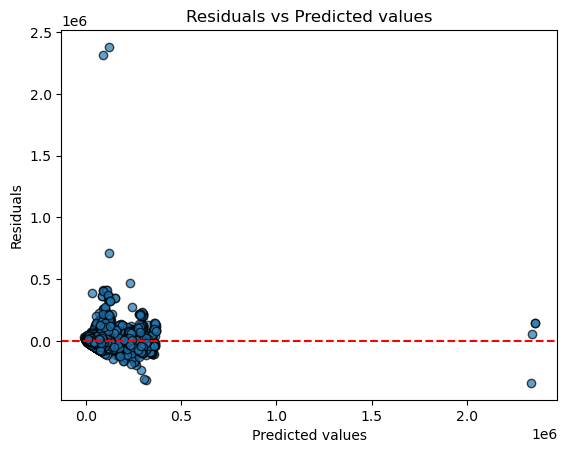

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2.Independence of errors(Durbin-Watson test):

Durbin-Watson statistics: 1.99029870900007
Residuals appear to be independent(No autocorrelation).

3.Homoscedasticity (Breusch-Pagan test) test:

Lagrange multiplier statistic: 103.9563004859964
p-value: 0.0052487854816687714
Residuals do not have constant variance (Homoscedasticity). Consider GLS or transformations.

4.Normality of errors:



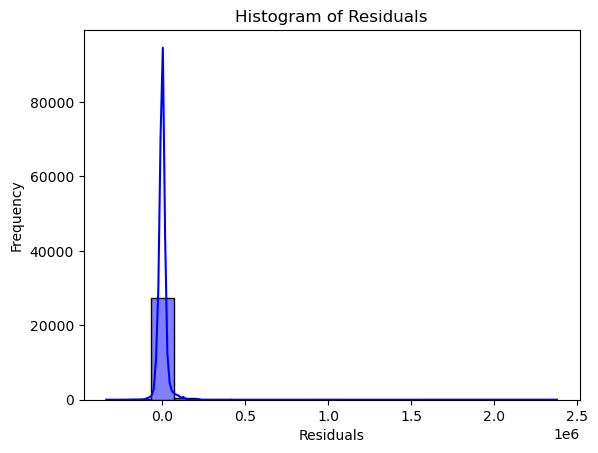

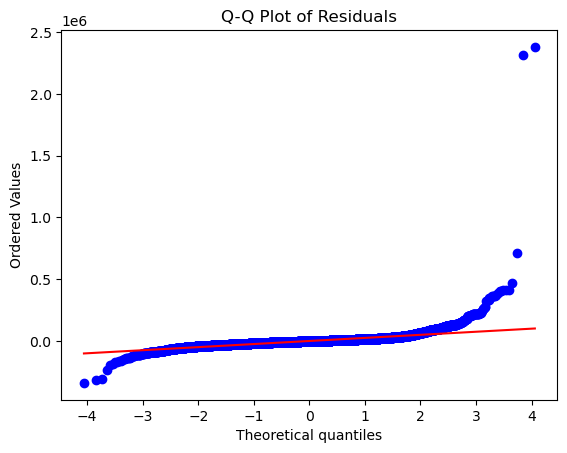

C:\Users\amesh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28143.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test p-value: 5.947648915397552e-124
Residuals are not normally distributed. Consider transformation or robust regression.

4.Multicollinarity (Variance Inflation Factor):



C:\Users\amesh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature       VIF
0         model_year  1.187395
1   miles_per_gallon  1.690856
2    premium_version  1.321688
3     collection_car  1.530893
4           (Acura,)       inf
..               ...       ...
65         (Pickup,)       inf
66            (SUV,)       inf
67          (Sedan,)       inf
68            (Van,)       inf
69          (Wagon,)       inf

[70 rows x 2 columns]
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [41]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro,probplot

def test_liner_regression_assumptions(X,Y,X_df):
    """
    Tests the key assumptions of linear regression:Linearity, independence(no correlation), homoscedasticity, 
    normality of residuals and no multi-collinearity.

    Parameters:
    X_df(DataFrame) : Independent variables
    Y(series) : Dependent variable

    Returns:
    None
    """
    
# Add constant to X for intercept
X=sm.add_constant(X)

# Fit the OLS model
ols_model=sm.OLS(Y,X).fit()
residuals=ols_model.resid
predicted_values=ols_model.fittedvalues

# 1. Linearity :
print("1.Linearity:\n")
plt.scatter(predicted_values,residuals,alpha=0.7,edgecolors='k')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
plt.show()
print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

# 2. No autocorrelation(Independence of errors) :
print("2.Independence of errors(Durbin-Watson test):\n")
dw_stat=durbin_watson(residuals)
print(f"Durbin-Watson statistics: {dw_stat}")
if 1.5<=dw_stat<=2.5:
    print("Residuals appear to be independent(No autocorrelation).\n")
else:
    print("Residuals show autocorrelation. Consider adding lag variable or using GLS.\n")

# 3. Homoscedasticity : 
print("3.Homoscedasticity (Breusch-Pagan test) test:\n")
bp_test=het_breuschpagan(residuals,X)
print(f"Lagrange multiplier statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
if bp_test[1]>0.05:
    print("Residuals have constant variance (Homoscedasticity).\n")
else:
    print("Residuals do not have constant variance (Homoscedasticity). Consider GLS or transformations.\n")

# 4. Normality of errors : 
print("4.Normality of errors:\n")
sns.histplot(residuals,kde=True,bins=20,color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

probplot(residuals,dist="norm",plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test=shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue>0.05:
    print("Residuals are normally distributed.\n")
else:
    print("Residuals are not normally distributed. Consider transformation or robust regression.\n")

# 5. Multicollinarity : 
print("4.Multicollinarity (Variance Inflation Factor):\n")
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_df.columns
vif_data["VIF"]=[variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
print(vif_data)                                           # Variance of one column with all other independent columns
if vif_data["VIF"].max()>10:
    print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
else:
    print("No significant multicollinearity detected.\n")

# Polynomail regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [44]:
X_train[0].size

70

In [45]:
X_poly_train[0].size

2556

In [46]:
X_train[0]

array([2.02e+03, 2.50e+01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00])

In [47]:
X_poly_train[0]

array([1.00e+00, 2.02e+03, 2.50e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00])

In [48]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)
Y_poly_pred = poly_model.predict(X_poly_train)
Y_poly_pred

array([28596.36887636, 29185.63100762, 48420.50382876, ...,
       27914.95477173, 30549.95389257, 54473.38146716])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
# On training data
mse_poly_train = mean_squared_error(Y_train, Y_poly_pred)
rmse_poly_train = mse_poly_train ** 0.5 
mae_poly_train = mean_absolute_error(Y_train, Y_poly_pred)
r2_poly_train = r2_score(Y_train, Y_poly_pred)

print(mse_poly_train)
print(rmse_poly_train)
print(mae_poly_train)
print(r2_poly_train)

744666137.8376466
27288.571560960216
13344.82125247022
0.8051679973581233


In [51]:
Y_poly_pred_test = poly_model.predict(X_poly_test)

In [52]:
# On testing data
mse_poly_test = mean_squared_error(Y_test, Y_poly_pred_test)
rmse_poly_test = mse_poly_test ** 0.5  
mae_poly_test = mean_absolute_error(Y_test, Y_poly_pred_test)
r2_poly_test = r2_score(Y_test, Y_poly_pred_test)

print(mse_poly_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_test)

1848153243.4680178
42990.15286630204
14648.646288274444
0.4848569019647804


# Regularization techniques

# 1. Lasso algorithm

In [53]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l1=Lasso(alpha=1.0)                                   # alpha is lamda 
l1.fit(X_train,Y_train)
Y_pred_train_l1=l1.predict(X_train) 

mse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)
rmse_l1_train=mean_squared_error(Y_pred_train_l1,Y_train)**0.5
mae_l1_train=mean_absolute_error(Y_pred_train_l1,Y_train)
r2_l1_train=r2_score(Y_train,Y_pred_train_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

999817533.7743629
31619.89142572066
16376.90671944352
0.7384110241035409


C:\Users\amesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.011e+10, tolerance: 8.605e+09
  model = cd_fast.enet_coordinate_descent(


In [54]:
# On testing data
l1=Lasso(alpha=1.0)                                   # alpha is lamda 
l1.fit(X_test,Y_test)
Y_pred_test_l1=l1.predict(X_test) 

mse_l1_test=mean_squared_error(Y_pred_test_l1,Y_test)
rmse_l1_test=mean_squared_error(Y_pred_test_l1,Y_test)**0.5
mae_l1_test=mean_absolute_error(Y_pred_test_l1,Y_test)
r2_l1_test=r2_score(Y_test,Y_pred_test_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1826600919.9381857
42738.751969824596
17021.054616211426
0.49086426675027917


C:\Users\amesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+11, tolerance: 2.019e+09
  model = cd_fast.enet_coordinate_descent(


# 2. Ridge algorithm

In [55]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l2=Ridge(alpha=1.0)                                   # alpha is lamda 
l2.fit(X_train,Y_train)
Y_pred_train_l2=l2.predict(X_train) 

mse_l2_train=mean_squared_error(Y_pred_train_l2,Y_train)
rmse_l2_train=mean_squared_error(Y_pred_train_l2,Y_train)**0.5
mae_l2_train=mean_absolute_error(Y_pred_train_l2,Y_train)
r2_l2_train=r2_score(Y_train,Y_pred_train_l2)            # goodness of fit of training data, range is 0 to 1
print(mse_l2_train)
print(rmse_l2_train)
print(mae_l2_train)
print(r2_l2_train)

1034640461.9227256
32165.82754916661
16487.798293146327
0.7293000675496405


In [56]:
# On testing data
l2=Ridge(alpha=1.0)                                   # alpha is lamda 
l2.fit(X_test,Y_test)
Y_pred_test_l2=l2.predict(X_test) 

mse_l2_test=mean_squared_error(Y_pred_test_l2,Y_test)
rmse_l2_test=mean_squared_error(Y_pred_test_l2,Y_test)**0.5
mae_l2_test=mean_absolute_error(Y_pred_test_l2,Y_test)
r2_l2_test=r2_score(Y_test,Y_pred_test_l2)            # goodness of fit of training data, range is 0 to 1
print(mse_l2_test)
print(rmse_l2_test)
print(mae_l2_test)
print(r2_l2_test)

1830516759.9093719
42784.53879509947
17106.63057856898
0.4897727891137269


# 3. ElasticNet algorithm

In [57]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# On training data
l3=ElasticNet(alpha=1.0, l1_ratio=0.6)                                   # alpha is lamda 
l3.fit(X_train,Y_train)
Y_pred_train_l3=l3.predict(X_train) 

mse_l3_train=mean_squared_error(Y_pred_train_l3,Y_train)
rmse_l3_train=mean_squared_error(Y_pred_train_l3,Y_train)**0.5
mae_l3_train=mean_absolute_error(Y_pred_train_l3,Y_train)
r2_l3_train=r2_score(Y_train,Y_pred_train_l3)            # goodness of fit of training data, range is 0 to 1
print(mse_l3_train)
print(rmse_l3_train)
print(mae_l3_train)
print(r2_l3_train)

3084169310.224832
55535.297876439196
25572.571395572733
0.19306807082353483


In [58]:
# On testing data
l3=ElasticNet(alpha=1.0, l1_ratio=0.6)                                   # alpha is lamda 
l3.fit(X_test,Y_test)
Y_pred_test_l3=l3.predict(X_test) 

mse_l3_test=mean_squared_error(Y_pred_test_l3,Y_test)
rmse_l3_test=mean_squared_error(Y_pred_test_l3,Y_test)**0.5
mae_l3_test=mean_absolute_error(Y_pred_test_l3,Y_test)
r2_l3_test=r2_score(Y_test,Y_pred_test_l3)            # goodness of fit of training data, range is 0 to 1
print(mse_l3_test)
print(rmse_l3_test)
print(mae_l3_test)
print(r2_l3_test)

2921910630.640948
54054.700356592
25082.857225282743
0.18556423837130398


# KNN regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
# On training data
knn_r=KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train,Y_train)
Y_train_knn=knn_r.predict(X_train)

mse_knn_train=mean_squared_error(Y_train_knn,Y_train)
rmse_knn_train=mean_squared_error(Y_train_knn,Y_train)**0.5
mae_knn_train=mean_absolute_error(Y_train_knn,Y_train)
r2_knn_train=r2_score(Y_train,Y_train_knn)            # goodness of fit of training data, range is 0 to 1
print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

851420378.9046409
29179.108603667813
11222.277137075851
0.7772371683318531


In [60]:
# On testing data
knn_r=KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_test,Y_test)
Y_test_knn=knn_r.predict(X_test)

mse_knn_test=mean_squared_error(Y_test_knn,Y_test)
rmse_knn_test=mean_squared_error(Y_test_knn,Y_test)**0.5
mae_knn_test=mean_absolute_error(Y_test_knn,Y_test)
r2_knn_test=r2_score(Y_test,Y_test_knn)            # goodness of fit of training data, range is 0 to 1
print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)

1284960381.9409306
35846.34405264965
13808.946979610206
0.6418378863630065


# SVR

In [61]:
from sklearn.svm import SVR
# On training data
svr=SVR()
svr.fit(X_train,Y_train)
Y_train_svr=svr.predict(X_train)

mse_svr_train=mean_squared_error(Y_train_svr,Y_train)
rmse_svr_train=mean_squared_error(Y_train_svr,Y_train)**0.5
mae_svr_train=mean_absolute_error(Y_train_svr,Y_train)
r2_svr_train=r2_score(Y_train,Y_train_svr)            # goodness of fit of training data, range is 0 to 1
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

4079217461.737855
63868.751841083096
28210.536962625018
-0.06727305956186092


In [62]:
# On testing data
svr=SVR()
svr.fit(X_test,Y_test)
Y_test_svr=svr.predict(X_test)

mse_svr_test=mean_squared_error(Y_test_svr,Y_test)
rmse_svr_test=mean_squared_error(Y_test_svr,Y_test)**0.5
mae_svr_test=mean_absolute_error(Y_test_svr,Y_test)
r2_svr_test=r2_score(Y_test,Y_test_svr)            # goodness of fit of training data, range is 0 to 1
print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

3833700272.664736
61916.88196820586
27314.747750612914
-0.06858251196373466


# Decision tree regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
# On training data
dtree=DecisionTreeRegressor(max_depth=3, random_state=0)    # max_depth is the depth of the how much data should be divided,max_depth is more then error is less and vice versa 
dtree.fit(X_train,Y_train)
Y_train_dtree=dtree.predict(X_train)

mse_dtree_train=mean_squared_error(Y_train_dtree,Y_train)
rmse_dtree_train=mean_squared_error(Y_train_dtree,Y_train)**0.5
mae_dtree_train=mean_absolute_error(Y_train_dtree,Y_train)
r2_dtree_train=r2_score(Y_train,Y_train_dtree)            # goodness of fit of training data, range is 0 to 1
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

1773285338.066269
42110.3946557886
22985.922318478883
0.5360434480421432


In [64]:
# On testing data
dtree=DecisionTreeRegressor(max_depth=3, random_state=0)    # max_depth is the depth of the how much data should be divided,max_depth is more then error is less and vice versa 
dtree.fit(X_test,Y_test)
Y_test_dtree=dtree.predict(X_test)

mse_dtree_test=mean_squared_error(Y_test_dtree,Y_test)
rmse_dtree_test=mean_squared_error(Y_test_dtree,Y_test)**0.5
mae_dtree_test=mean_absolute_error(Y_test_dtree,Y_test)
r2_dtree_test=r2_score(Y_test,Y_test_dtree)            # goodness of fit of training data, range is 0 to 1
print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

1555189250.9246337
39435.88785515845
22362.23612977661
0.5665159198330016


# Random forest regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
# On training data
forest=RandomForestRegressor(max_depth=20,n_estimators=100, random_state=0)     # n_estimators is no. of trees
forest.fit(X_train,Y_train)
Y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(Y_train_forest,Y_train)
rmse_forest_train=mean_squared_error(Y_train_forest,Y_train)**0.5
mae_forest_train=mean_absolute_error(Y_train_forest,Y_train)
r2_forest_train=r2_score(Y_train,Y_train_forest)            # goodness of fit of training data, range is 0 to 1
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)

258206091.7342535
16068.79247903381
8178.696236470972
0.9324438061693028


In [66]:
# On testing data
forest=RandomForestRegressor(max_depth=20,n_estimators=100, random_state=0)     # n_estimators is no. of trees
forest.fit(X_test,Y_test)
Y_test_forest=forest.predict(X_test)

mse_forest_test=mean_squared_error(Y_test_forest,Y_test)
rmse_forest_test=mean_squared_error(Y_test_forest,Y_test)**0.5
mae_forest_test=mean_absolute_error(Y_test_forest,Y_test)
r2_forest_test=r2_score(Y_test,Y_test_forest)            # goodness of fit of training data, range is 0 to 1
print(mse_forest_test)
print(rmse_forest_test)
print(mae_forest_test)
print(r2_forest_test)

297673263.90582705
17253.210249279033
7121.873140278488
0.9170283482104784


### Here the best ML model is Random forest regressor with r2 score of 0.9 for training as well as testing data